In [1]:
# pip install dataframe_image

In [2]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import dataframe_image as df
from scipy.stats import linregress


file_1 = "co-est2021-pop-13.csv"
file_2 = "co-est2020-alldata.csv"

file_1_df = pd.read_csv(file_1, delimiter=",", skiprows=3)

file_1_df.tail(10)
recent_census =file_1_df.drop(range(160,165))
recent_census


,Unnamed: 0,Unnamed: 1,2020,2021
0,Georgia,"10,711,908","10,725,800","10,799,566"
1,".Appling County, Georgia","18,444","18,428","18,488"
2,".Atkinson County, Georgia","8,286","8,301","8,391"
3,".Bacon County, Georgia","11,140","11,123","11,079"
4,".Baker County, Georgia","2,876","2,844","2,819"
...,...,...,...,...
155,".Whitfield County, Georgia","102,864","102,727","102,848"
156,".Wilcox County, Georgia","8,766","8,731","8,739"
157,".Wilkes County, Georgia","9,565","9,556","9,513"
158,".Wilkinson County, Georgia","8,877","8,844","8,831"


In [3]:
#removing the '.' in front of the county names
recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')

# removing 'Georgia' from the counties
county21 = recent_census21.str.split(',').str[0]

#print(county21)

C:\Users\yhuan\AppData\Local\Temp/ipykernel_24096/1222772202.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  recent_census21 = recent_census['Unnamed: 0'].str.replace('.','')


In [4]:
# extracting 2020 and 2021 columns
data21 = recent_census[['2020','2021']]

#convert object to int
census_20 = pd.to_numeric(data21['2020'].str.replace(',',''), errors = 'coerce')

#print(census_20)

In [5]:
#convert object to int
census_21 = pd.to_numeric(recent_census['2021'].str.replace(',',''), errors = 'coerce')

#print(census_21)

In [6]:
# create a cleaned up dataframe
organized_21 = pd.DataFrame({"County":county21,"2020":census_20, "2021":census_21 })

#set index to county
census21_df= organized_21.set_index("County")

#print(census21_df)

In [7]:
#read csv file
file_2_df = pd.read_csv(file_2, delimiter=",", encoding="ISO-8859-1")

# extract Georgia's data from national data
file_2_ga = file_2_df[file_2_df['STNAME'] == 'Georgia']
file_2_ga.to_csv('cleanerCounties.csv')
#print(file_2_ga)

In [8]:
#extract the population data of interest
ga_census_estimate_population = file_2_ga[["CTYNAME","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017", "POPESTIMATE2018","POPESTIMATE2019"]]

#rename columns
ga_census_estimate_population = ga_census_estimate_population.rename(columns={"CTYNAME":"County","POPESTIMATE2010": "2010", "POPESTIMATE2011": "2011", "POPESTIMATE2012": "2012", "POPESTIMATE2013": "2013", "POPESTIMATE2014": "2014", "POPESTIMATE2015": "2015", "POPESTIMATE2016": "2016", "POPESTIMATE2017": "2017", "POPESTIMATE2018": "2018", "POPESTIMATE2019": "2019"})

#set index to county
ga_census_20 = ga_census_estimate_population.set_index("County")

#print(ga_census_20)

In [9]:
#merge csv files 

merge_census_raw = census21_df.merge(ga_census_20,how ='right', on ='County')

#label column names
column_names = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]

#reindex

merge_census = merge_census_raw.reindex(columns=column_names)

#print(merge_census)

In [10]:
# select 10 random counties
samples_df = merge_census.sample(10)

#Transpose index and column
samples_df.T

County,Decatur County,Long County,Baldwin County,Haralson County,Lumpkin County,Marion County,Bleckley County,Telfair County,Elbert County,Peach County
2010,27815,14575,45703,28763,30281,8741,13033,16519,20101,28104
2011,27655,15097,45178,28474,30453,8699,13077,16242,19822,28031
2012,27449,16013,46522,28325,30684,8672,12888,16364,19577,28012
2013,27401,16510,46191,28357,30872,8581,12742,16624,19492,27411
2014,27183,17058,45920,28513,31122,8636,12706,16448,19391,27391
2015,27063,17695,45566,28733,31292,8561,12710,16448,19303,27216
2016,26682,18392,45260,28860,31422,8490,12868,15960,19122,27111
2017,26727,18822,44993,29286,32812,8438,12769,15912,19104,27179
2018,26613,19148,45001,29626,32934,8392,12833,15888,19053,27574
2019,26496,19647,45006,29884,33692,8413,12923,15813,19205,27697


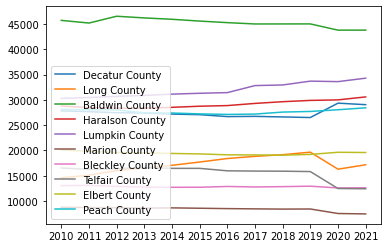

In [11]:
#plot the counties 
plt.plot(samples_df.T);
plt.legend(samples_df.index,loc="lower left")
plt.show()

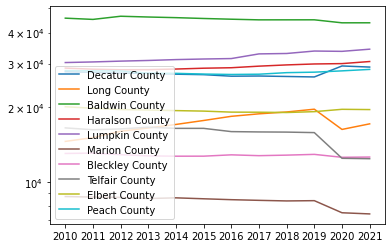

In [12]:
# plot the counties with log scale
plt.plot(samples_df.T);
plt.legend(samples_df.index,loc="lower left")
plt.yscale('log')
plt.show()

In [13]:
#determing percent change from year to year 
merge_pct_change = merge_census.pct_change(axis='columns', periods =1)
merge_pct_change

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,,
Georgia,NaN,0.009413,0.010195,0.007271,0.009585,0.011136,0.012284,0.010534,0.009826,0.010327,0.009200,0.006877
Appling County,NaN,0.006653,-0.004171,-0.000816,0.005553,-0.002653,0.001249,0.000217,0.004933,-0.008038,0.002121,0.003256
Atkinson County,NaN,-0.000478,-0.012561,0.001090,-0.006293,0.014615,-0.004561,-0.004341,0.010537,-0.008988,0.003870,0.010842
Bacon County,NaN,0.007955,0.000179,0.001973,0.000358,0.004205,0.003831,-0.005680,-0.009639,0.000180,0.002253,-0.003956
Baker County,NaN,-0.034975,0.017819,-0.007122,-0.017633,-0.028902,-0.002193,-0.008477,-0.021849,-0.013597,-0.066623,-0.008790
...,...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,NaN,0.001645,0.000165,-0.002283,0.003389,0.005648,0.006688,-0.002186,0.000221,0.001498,-0.014751,0.001178
Wilcox County,NaN,-0.006979,-0.019356,-0.001654,-0.013806,0.009632,-0.020078,-0.006113,0.000456,-0.020150,0.014407,0.000916
Wilkes County,NaN,-0.015305,-0.013392,-0.016051,0.002920,-0.003313,-0.011988,0.006117,-0.002331,-0.007720,-0.021804,-0.004500


In [14]:
#droping year 2010
merge_dropped=merge_pct_change.drop(columns= ['2010'])

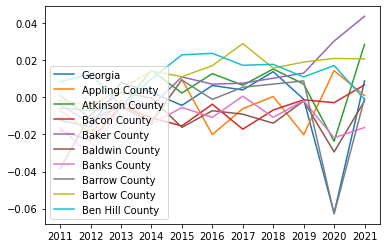

In [15]:
#plot percent change 

plt.plot(merge_dropped.sample(10).T);
plt.legend(merge_dropped.index,loc="lower left")

plt.show()

In [16]:
#export randomly selected counties table
samples_df.dfi.export('plots_tables/sample_counties.png')

In [17]:
# year to year percent change
samp_change = samples_df.pct_change(axis= 'columns', periods =1)

#dropping 2010 
clean_samp_change = samp_change.drop(columns= ['2010'])
#print(clean_samp_change)

In [18]:
# year to year percent change
samp_change = samples_df.pct_change(axis= 'columns', periods =1)

#dropping 2010 
clean_samp_change = samp_change.drop(columns= ['2010'])
# multiply by 100 for percent
per_samp_change= clean_samp_change*100

per_samp_change

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
County,,,,,,,,,,,
Decatur County,-0.575229,-0.744892,-0.174870,-0.795591,-0.441452,-1.407826,0.168653,-0.426535,-0.439635,10.726147,-1.022565
Long County,3.581475,6.067431,3.103728,3.319200,3.734318,3.938966,2.337973,1.732016,2.606016,-17.101848,5.310984
Baldwin County,-1.148721,2.974899,-0.711491,-0.586694,-0.770906,-0.671553,-0.589925,0.017781,0.011111,-2.739635,0.018276
Haralson County,-1.004763,-0.523284,0.112974,0.550129,0.771578,0.442000,1.476091,1.160964,0.870857,0.337973,1.957645
Lumpkin County,0.568013,0.758546,0.612697,0.809795,0.546237,0.415442,4.423652,0.371815,2.301573,-0.284934,2.030004
Marion County,-0.480494,-0.310381,-1.049354,0.640951,-0.868458,-0.829342,-0.612485,-0.545153,0.250238,-10.614525,-1.063830
Bleckley County,0.337605,-1.445286,-1.132837,-0.282530,0.031481,1.243116,-0.769350,0.501214,0.701317,-2.677397,0.238531
Telfair County,-1.676857,0.751139,1.588854,-1.058710,0.000000,-2.966926,-0.300752,-0.150830,-0.472054,-21.197749,-0.377177
Elbert County,-1.387991,-1.236000,-0.434183,-0.518161,-0.453819,-0.937678,-0.094132,-0.266960,0.797775,2.197344,-0.244561


In [19]:
#export percent change table
per_samp_change.dfi.export('plots_tables/per_samp_change.png')

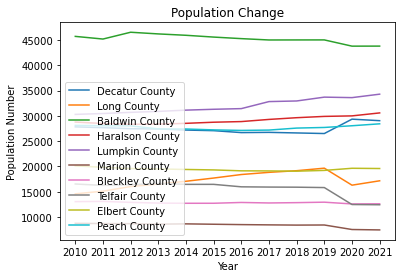

In [20]:
# plot sampled counties 
plt.plot(samples_df.T);
plt.legend(samples_df.index,loc="lower left")

#labeling
plt.title("Population Change")
plt.xlabel("Year")
plt.ylabel("Population Number")

#save figure 
plt.savefig('plots_tables/sample_counties_plot.png')
plt.show()

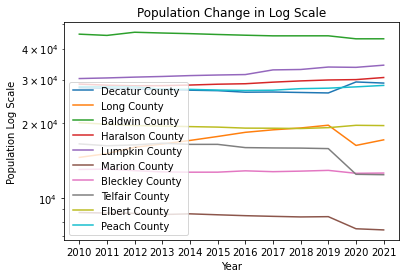

In [21]:
#plot sampled counties in log scale
plt.plot(samples_df.T);
plt.legend(samples_df.index,loc="lower left")

#labeling
plt.title("Population Change in Log Scale")
plt.xlabel("Year")
plt.ylabel("Population Log Scale")

#set log scale
plt.yscale('log')

#save figure
plt.savefig('plots_tables/sample_counties_plot_logscale.png')

plt.show()


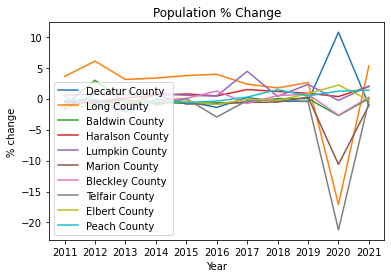

In [22]:
#plot percent change
plt.plot(per_samp_change.T);
plt.legend(per_samp_change.index,loc="lower left")

#labeling
plt.title("Population % Change")
plt.xlabel("Year")
plt.ylabel("% change")
plt.savefig('plots_tables/per_samp_change_plot.png')
plt.show()

The 10 counties are randomized when the kernal is restarted, but the counties that were selected are hard coded. These following counties are hard coded in reference to the initial merged dataframe.

In [23]:
#rename df
sample_counties = merge_census

#percent change
samp_change = sample_counties.pct_change(axis= 'columns', periods =1)

#drop 2010 
samp_change = samp_change.drop(columns=['2010'])
#multiply by 100 for percent
per_samp_change= samp_change*100

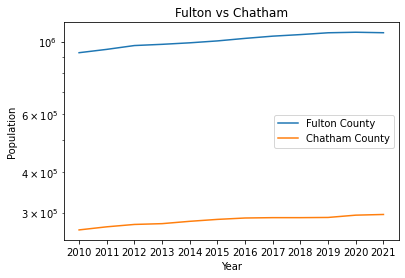

In [24]:
#compare the population change between Fulton and Chatham 
plt.plot(sample_counties.T['Fulton County'], label='Fulton County' );
plt.plot(sample_counties.T['Chatham County'], label='Chatham County' );
plt.legend(loc="best")
plt.yscale('log')

#labeling 
plt.title("Fulton vs Chatham")
plt.xlabel("Year")
plt.ylabel("Population")

#save figure
plt.savefig('plots_tables/fulton_chatham_plot.png')
plt.show()

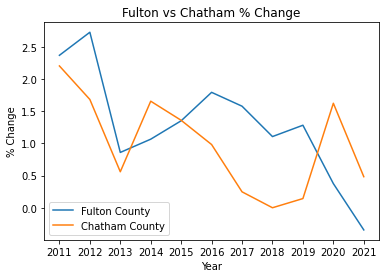

In [25]:
#compare % change between Fulton and Chatham
plt.plot(per_samp_change.T['Fulton County'], label='Fulton County');
plt.plot(per_samp_change.T['Chatham County'], label='Chatham County');
plt.legend(loc="lower left")

#labeling 
plt.title("Fulton vs Chatham % Change")
plt.xlabel("Year")
plt.ylabel("% Change")

plt.savefig('plots_tables/fulton_chatham_change_plot.png')
plt.show()

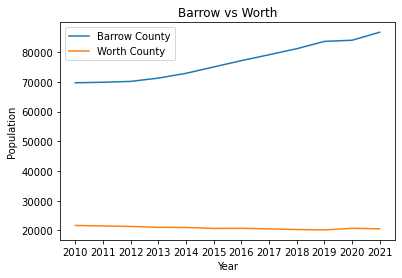

In [26]:
#compare population change between Barrow and County 
plt.plot(sample_counties.T['Barrow County'], label='Barrow County' );
plt.plot(sample_counties.T['Worth County'], label='Worth County' );
plt.legend(loc="best")

#labeling 
plt.title("Barrow vs Worth")
plt.xlabel("Year")
plt.ylabel("Population")

plt.savefig('plots_tables/barrow_worth_plot.png')
plt.show()

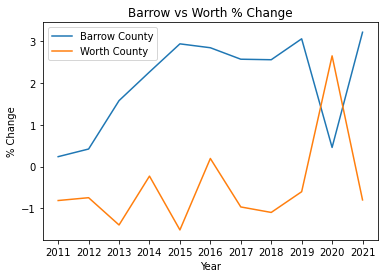

In [27]:
#compare % change between Barrow and Worth
plt.plot(per_samp_change.T['Barrow County'], label='Barrow County');
plt.plot(per_samp_change.T['Worth County'], label='Worth County');
plt.legend(loc="best")

#labeling 
plt.title("Barrow vs Worth % Change")
plt.xlabel("Year")
plt.ylabel("% Change")

plt.savefig('plots_tables/barrow_worth_change_plot.png')
plt.show()

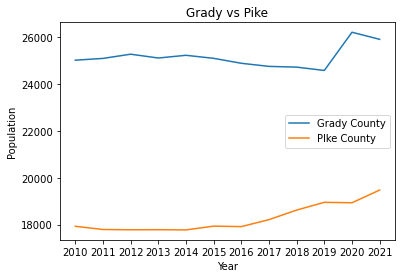

In [28]:
#compare the population change between Grady and Pike 
plt.plot(sample_counties.T['Grady County'], label='Grady County' );
plt.plot(sample_counties.T['Pike County'], label='PIke County' );
plt.legend(loc="best")

#labeling 
plt.title("Grady vs Pike")
plt.xlabel("Year")
plt.ylabel("Population")

plt.savefig('plots_tables/grady_pike_plot.png')
plt.show()

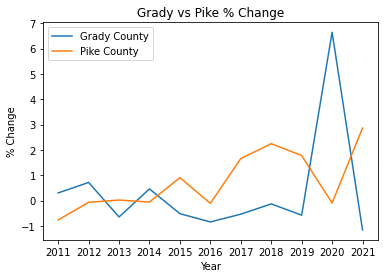

In [29]:
#compare % change between Grady and Pike
plt.plot(per_samp_change.T['Grady County'], label='Grady County');
plt.plot(per_samp_change.T['Pike County'], label='Pike County');
plt.legend(loc="best")
#labeling 
plt.title("Grady vs Pike % Change")
plt.xlabel("Year")
plt.ylabel("% Change")

plt.savefig('plots_tables/grady_pike_change_plot.png')
plt.show()

In [30]:
# setting the x and y axis 
fulton_years = sample_counties.T['Fulton County'].index.astype(float)
fulton_pop = sample_counties.T['Fulton County']

The r-squared is: 0.9674131773839155


<function matplotlib.pyplot.show(close=None, block=None)>

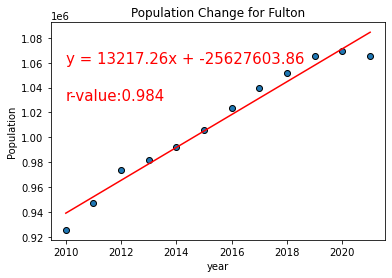

In [31]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(fulton_years,fulton_pop)
regress_values = fulton_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(fulton_years, fulton_pop, edgecolor = "black")

# draw our regression line
plt.plot(fulton_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2010,1060000),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2010,1030000), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Fulton")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/fulton_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [32]:
# setting the x and y axis 
fulton_per = per_samp_change.T['Fulton County']
fulton_per_year = per_samp_change.T['Fulton County'].index.astype(float)

The r-squared is: 0.5665640906797728


<function matplotlib.pyplot.show(close=None, block=None)>

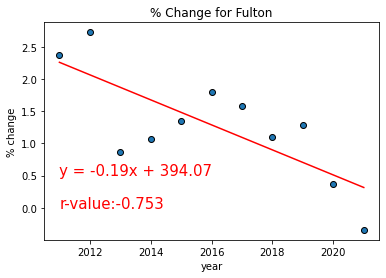

In [33]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(fulton_per_year,fulton_per)
regress_values = fulton_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(fulton_per_year, fulton_per, edgecolor = "black")

# draw our regression line
plt.plot(fulton_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2011,0.5),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2011,0), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Fulton")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/fulton_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [34]:
# setting the x and y axis 
chatham_years = sample_counties.T['Chatham County'].index.astype(float)
chatham_pop = sample_counties.T['Chatham County']

The r-squared is: 0.9337720205022068


<function matplotlib.pyplot.show(close=None, block=None)>

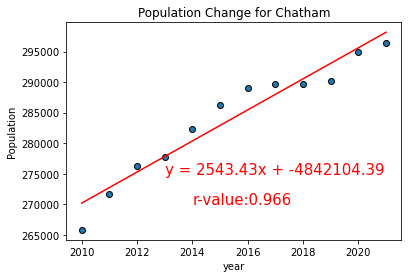

In [35]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(chatham_years,chatham_pop)
regress_values = chatham_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(chatham_years, chatham_pop, edgecolor = "black")

# draw our regression line
plt.plot(chatham_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2013,275000),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2014,270000), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Chatham")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/chatham_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [36]:
# setting the x and y axis 
chatham_per = per_samp_change.T['Chatham County']
chatham_per_year = per_samp_change.T['Chatham County'].index.astype(float)

The r-squared is: 0.3403660066509065


<function matplotlib.pyplot.show(close=None, block=None)>

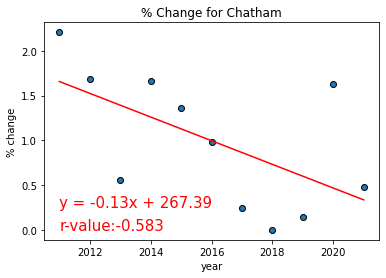

In [37]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(chatham_per_year,chatham_per)
regress_values = chatham_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(chatham_per_year, chatham_per, edgecolor = "black")

# draw our regression line
plt.plot(chatham_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2011,0.25),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2011,0), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Chatham")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/chatham_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [38]:
# setting the x and y axis 
grady_years = sample_counties.T['Grady County'].index.astype(float)
grady_pop = sample_counties.T['Grady County']

The r-squared is: 0.09159820413588947


<function matplotlib.pyplot.show(close=None, block=None)>

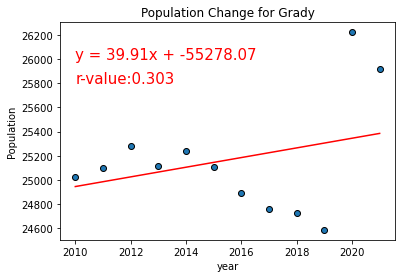

In [39]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(grady_years,grady_pop)
regress_values = grady_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(grady_years, grady_pop, edgecolor = "black")

# draw our regression line
plt.plot(grady_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2010,26000),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2010,25800), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Grady")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/grady_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [40]:
# setting the x and y axis 
grady_per = per_samp_change.T['Grady County']
grady_per_year = per_samp_change.T['Grady County'].index.astype(float)

The r-squared is: 0.04592530592906027


<function matplotlib.pyplot.show(close=None, block=None)>

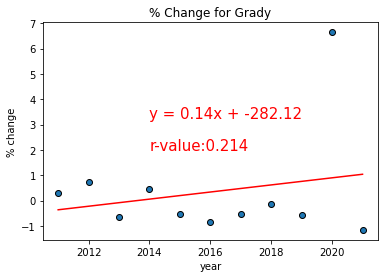

In [41]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(grady_per_year,grady_per)
regress_values = grady_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(grady_per_year, grady_per, edgecolor = "black")

# draw our regression line
plt.plot(grady_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2014,3.25),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2014,2), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Grady")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/grady_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [42]:
# setting the x and y axis 
worth_years = sample_counties.T['Worth County'].index.astype(float)
worth_pop = sample_counties.T['Worth County']

The r-squared is: 0.7764997093787491


<function matplotlib.pyplot.show(close=None, block=None)>

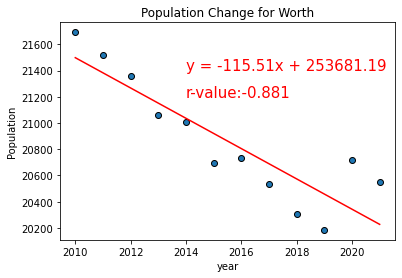

In [43]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(worth_years,worth_pop)
regress_values = worth_years * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(worth_years, worth_pop, edgecolor = "black")

# draw our regression line
plt.plot(worth_years,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2014,21400),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2014,21200), fontsize = 15, color = "red")
#labeling 
plt.title("Population Change for Worth")
plt.xlabel("year")
plt.ylabel("Population")
plt.savefig('plots_tables/worth_pop_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show

In [44]:
# setting the x and y axis 
worth_per = per_samp_change.T['Worth County']
worth_per_year = per_samp_change.T['Worth County'].index.astype(float)

The r-squared is: 0.15259008460634854


<function matplotlib.pyplot.show(close=None, block=None)>

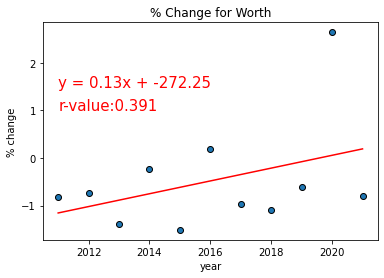

In [45]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(worth_per_year,worth_per)
regress_values = worth_per_year * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(worth_per_year, worth_per, edgecolor = "black")

# draw our regression line
plt.plot(worth_per_year,regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(2011,1.5),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(2011,1), fontsize = 15, color = "red")
#labeling 
plt.title("% Change for Worth")
plt.xlabel("year")
plt.ylabel("% change")
plt.savefig('plots_tables/worth_pop_per_reg.png')
print(f"The r-squared is: {rvalue**2}")
plt.show